In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [3]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

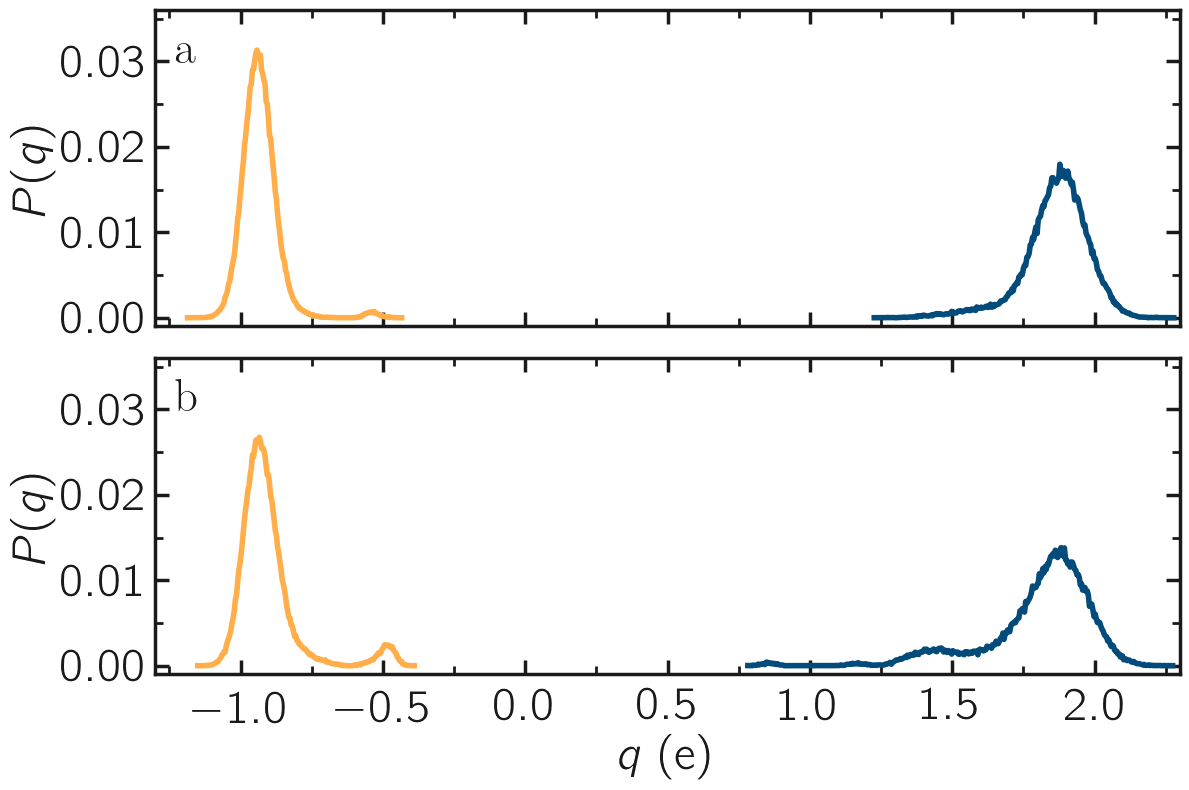

In [8]:
filename = "SIO-distribution"

# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=1, n_line=2)

hist_O = np.loadtxt("relax-O.histo", skiprows=4)
hist_Si = np.loadtxt("relax-Si.histo", skiprows=4)

# Panel a
myplt.add_panel()
myplt.add_plot(x = hist_Si[:,1][hist_Si[:,3]>0], y = hist_Si[:,3][hist_Si[:,3]>0], type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = hist_O[:,1][hist_O[:,3]>0], y = hist_O[:,3][hist_O[:,3]>0], type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12)
myplt.complete_panel(ylabel = r'$P (q)$',
                     xlabel =None, xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-1., 2.4, 0.5), y_ticks=np.arange(0, 0.031, 0.01),
                    x_boundaries=(-1.3, 2.3), y_boundaries=(-0.001, 0.036))

hist_O = np.loadtxt("deform-O.histo", skiprows=5009)
hist_Si = np.loadtxt("deform-Si.histo", skiprows=5009)

# Panel a
myplt.add_panel()
myplt.add_plot(x = hist_Si[:,1][hist_Si[:,3]>0], y = hist_Si[:,3][hist_Si[:,3]>0], type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = hist_O[:,1][hist_O[:,3]>0], y = hist_O[:,3][hist_O[:,3]>0], type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12)
myplt.complete_panel(ylabel = r'$P (q)$',
                     xlabel = r'$q ~ (\mathrm{e})$', xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(-1., 2.4, 0.5), y_ticks=np.arange(0, 0.031, 0.01),
                    x_boundaries=(-1.3, 2.3), y_boundaries=(-0.001, 0.036))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)